<a href="https://colab.research.google.com/github/AdityaKalkeri/DataTrained-Projects/blob/master/Project%2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving aggregate_covid_country.csv to aggregate_covid_country.csv


In [ ]:
import io 
  
df = pd.read_csv(io.BytesIO(uploaded['aggregate_covid_country.csv'])) 
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0


In [ ]:
uploaded2 = files.upload()

Saving continent.csv to continent.csv


In [ ]:
df1= pd.read_csv(io.BytesIO(uploaded2['continent.csv']), encoding='cp1252') 
df1.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [ ]:
df1 = df1[["country", "continent"]]
df1.rename(columns={"country": "Country"}, inplace = True)
#lets check which countries dont match in both the dataframes
not_match= []
for i in df["Country"].unique():
    if i not in df1["Country"].unique():
        not_match.append(i)

not_match

['Bolivia',
 'Brunei',
 'Burma',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 "Cote d'Ivoire",
 'Czechia',
 'Diamond Princess',
 'Eswatini',
 'Iran',
 'Korea, South',
 'Kosovo',
 'Laos',
 'MS Zaandam',
 'Moldova',
 'North Macedonia',
 'Russia',
 'Syria',
 'Taiwan*',
 'Tanzania',
 'US',
 'United Kingdom',
 'Venezuela',
 'Vietnam',
 'West Bank and Gaza']

In [ ]:
country_dict = {
"Bolivia" : 'Bolivia (Plurinational State of)',
'Brunei' : 'Brunei Darussalam',
'Burma' : 'Myanmar',
'Congo (kinasha)' : 'Congo (Democratic Republic of the)',
'Congo (Brazzaville)' : 'Congo',
'Czechia' : 'Czech Republic',
'Iran' : 'Iran (Islamic Republic of)',
'Korea, South' : 'Republic of Korea',
'Laos' : '''Lao People's Democratic Republic''',
'North Macedonia' : 'Macedonia (the former Yugoslav Republic of)',
'Russia' : 'Russian Federation',
'Taiwan*' : 'Taiwan, Province of China',
'Tanzania' : 'Tanzania, United Republic of',
'US': 'United States of America',
'United Kingdom' : 'United Kingdom of Great Britain and Northern Ireland',
'Venezuela' : 'Venezuela (Bolivarian Republic of)',
'Vietnam' : 'Viet Nam',
'Moldova' :'Moldova (Republic of)'
}
dict1 = {}
for i in country_dict:
    dict1[country_dict[i]] = i 

df1["Country"] = df1['Country'].replace(dict1)

df1.head()

,Country,continent
0,Afghanistan,Asia
1,Åland Islands,Europe
2,Albania,Europe
3,Algeria,Africa
4,American Samoa,Oceania


In [ ]:
df1.set_index("Country", inplace = True)
map_dict = df1["continent"].to_dict()
map_dict

{'Afghanistan': 'Asia',
 'Albania': 'Europe',
 'Algeria': 'Africa',
 'American Samoa': 'Oceania',
 'Andorra': 'Europe',
 'Angola': 'Africa',
 'Anguilla': 'Americas',
 'Antarctica': nan,
 'Antigua and Barbuda': 'Americas',
 'Argentina': 'Americas',
 'Armenia': 'Asia',
 'Aruba': 'Americas',
 'Australia': 'Oceania',
 'Austria': 'Europe',
 'Azerbaijan': 'Asia',
 'Bahamas': 'Americas',
 'Bahrain': 'Asia',
 'Bangladesh': 'Asia',
 'Barbados': 'Americas',
 'Belarus': 'Europe',
 'Belgium': 'Europe',
 'Belize': 'Americas',
 'Benin': 'Africa',
 'Bermuda': 'Americas',
 'Bhutan': 'Asia',
 'Bolivia': 'Americas',
 'Bonaire, Sint Eustatius and Saba': 'Americas',
 'Bosnia and Herzegovina': 'Europe',
 'Botswana': 'Africa',
 'Bouvet Island': nan,
 'Brazil': 'Americas',
 'British Indian Ocean Territory': nan,
 'Brunei': 'Asia',
 'Bulgaria': 'Europe',
 'Burkina Faso': 'Africa',
 'Burma': 'Asia',
 'Burundi': 'Africa',
 'Cabo Verde': 'Africa',
 'Cambodia': 'Asia',
 'Cameroon': 'Africa',
 'Canada': 'Americas'

In [ ]:
def continent(row):
    try:
        row["Continent"] = map_dict[row["Country"]]
    except:
        row["Continent"] = np.nan
    return row
df = df.apply(continent, axis = 1)

In [ ]:
bool_series = pd.isnull(df["Continent"])
null_countries = df[bool_series]
null_countries["Country"].unique()

array(['Congo (Kinshasa)', "Cote d'Ivoire", 'Diamond Princess',
       'Eswatini', 'Korea, South', 'Kosovo', 'MS Zaandam', 'Syria',
       'West Bank and Gaza'], dtype=object)

#### Diamond Princess and MS Zaandam are Cruise ships, while Kosovo and  West Bank and Gaza are both disputed areas and included in Serbia and Israel .

#### Thus we can drop their rows as it wont affect our analysis

In [ ]:
def continent1(row):
    if row["Country"] == "Congo (Kinshasa)":
        row["Continent"] = "Africa"
    elif row["Country"] == "Korea, South":
        row["Continent"] = "Asia"
    elif row["Country"] == "Syria":
        row["Continent"] = "Asia"
    return row
df = df.apply(continent1, axis = 1)

In [ ]:
df = df.dropna()


In [ ]:
#Converting to datetime
df["Datetime"] = pd.to_datetime(df["Date"])
df.drop("Date", axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22932 entries, 0 to 23687
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Country    22932 non-null  object        
 1   Confirmed  22932 non-null  int64         
 2   Recovered  22932 non-null  int64         
 3   Deaths     22932 non-null  int64         
 4   Continent  22932 non-null  object        
 5   Datetime   22932 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 1.2+ MB


**As we see, the disease spread from China to other world starting from Feb 2020**

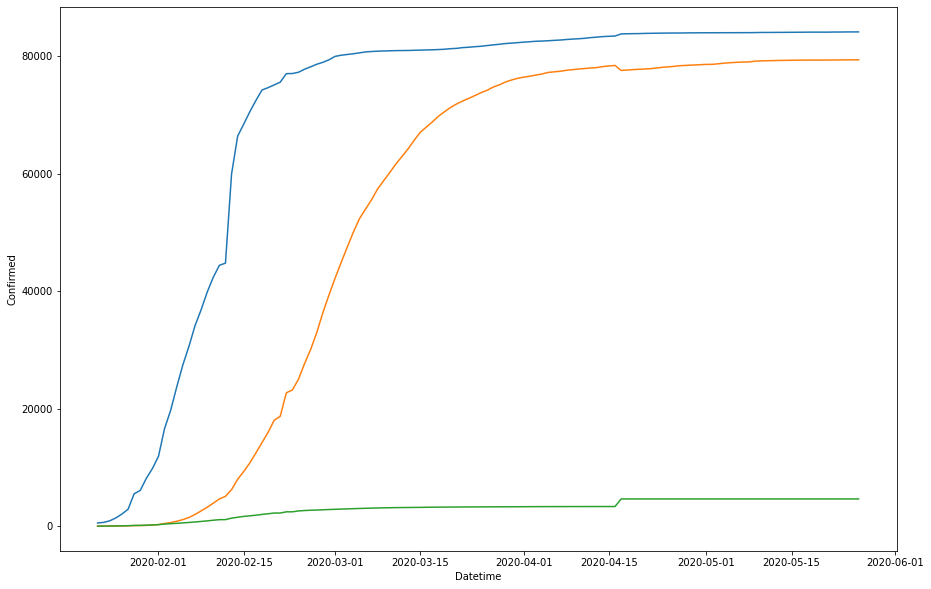

In [ ]:
china = df[df['Country'] == 'China']
china = china.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plt.figure().set_size_inches(15,10)
sns.lineplot(x = "Datetime", y = "Confirmed", data = china)
sns.lineplot(x = "Datetime", y = "Recovered", data = china)
sns.lineplot(x = "Datetime", y = "Deaths", data = china)

**While The pandemic started somewhere around Dec, we saw a dramatic spike in cases in Jan and Feb, but was controlled and remained constant at approx 80,000**

**Death Rate remained low and recovery rate high** 

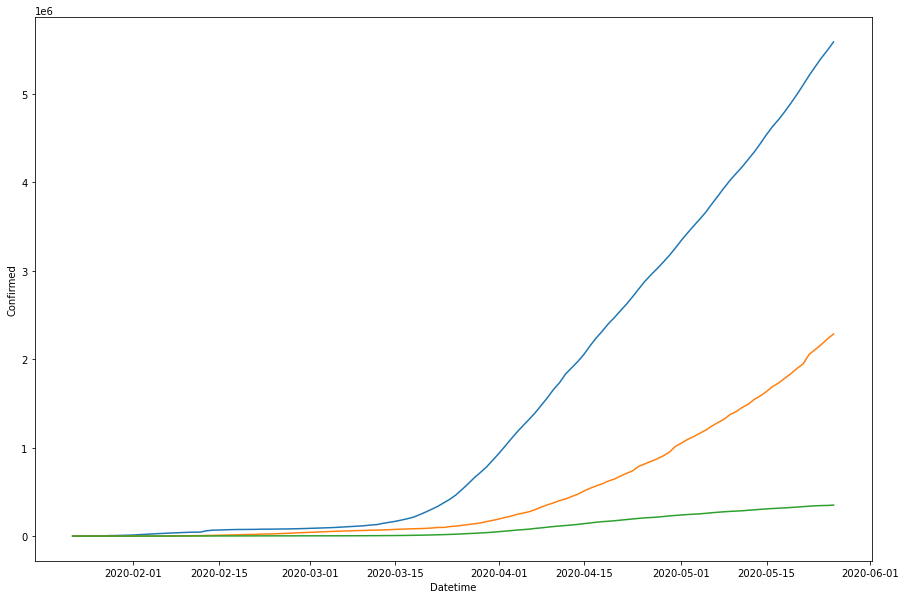

In [ ]:
df_grp = df.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plt.figure().set_size_inches(15,10)
sns.lineplot(x = "Datetime", y = "Confirmed", data = df_grp)
sns.lineplot(x = "Datetime", y = "Recovered", data = df_grp)
sns.lineplot(x = "Datetime", y = "Deaths", data = df_grp)

**As we see, the disease spread from China to other world starting from Feb 2020**

## THE WHO PANDEMIC PHASES

The grouping and description of pandemic phases have been revised to make them easier to understand, more precise, and based upon observable phenomena.

### Stage 1

In the first stage of a pandemic, the disease doesn’t spread locally - cases reported are usually people who have had travel history to an already affected country.

### Stage 2

This is the stage of local transmission - when people who have brought the virus into the country transmit it to people they come in contact with, usually friends and family. At this stage, it is easy to trace spread and quarantine people.

### Stage 3

The third stage is when the source of the infection is untraceable; this stage is identified by people who haven’t had travel history getting affected by the virus - once here spread is extremely contagious and difficult to control

### Stage 4

Spread is practically uncontrollable and there are many major clusters of infection all over the countries.


As we know the first stages of the virus were noticed in late December and January, that was the first and second stages in China, the number was less than 500 and lockdown applied then would have brought down the pandemic. But unfortunately it was'nt taken too seriously by China and WHO.

As we see, right at the start of Feb, the number of cases in China spiked and the stage 3 of pandemic begin. The people started running away from Wuhan and towards their own countries. This led to mass spread of disease. 

In just 15 days, around 15th Feb, China entered stage 4

Looking at the world data, we can see the early spikes in mid -February. Travel ban should have occured then. But most of the countries were lazy in their application of ban. 

By March 15, many of the countries were entering into stage 2 of the pandemic where the people around those who travelled were getting infected.

Stage 3 started by march end, where there was increase in cases as Health care workers and Govt officials were getting infected.

By Mid- April, the situation entered stage 4, where there was exponential growth of cases and literally every country on the planet was affected.

In [ ]:
def plotfig(a):
  plt.figure().set_size_inches(15,10)
  sns.lineplot(x = "Datetime", y = "Confirmed", data = a)
  sns.lineplot(x = "Datetime", y = "Recovered", data = a)
  sns.lineplot(x = "Datetime", y = "Deaths", data = a)


# Asia 

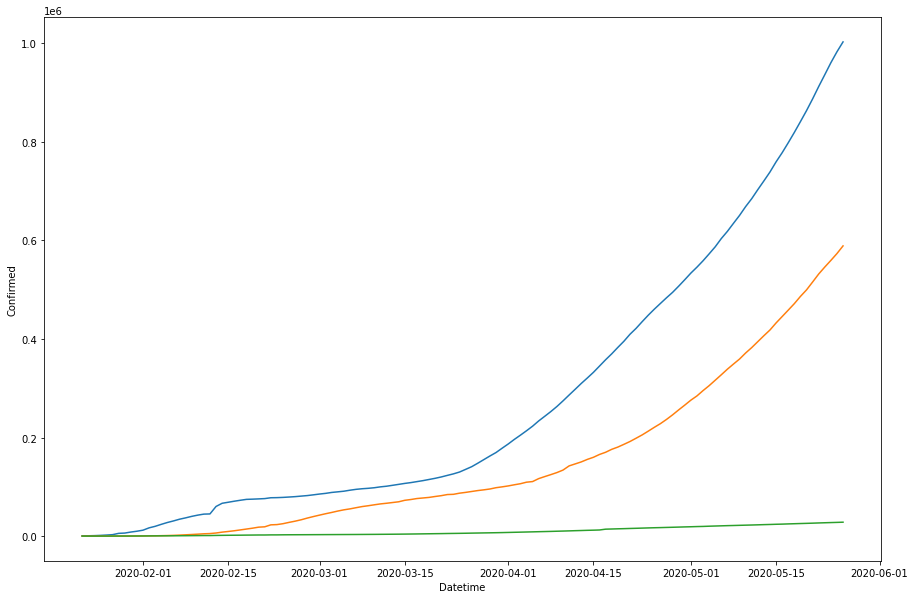

In [ ]:
asia = df[df["Continent"] == "Asia"]
asia = asia.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plotfig(asia)

**At start, China Contributed a lot of cases in Asia, but other countries started to pick up.**
**The death rate remains very very low for Asian countries**

# Africa

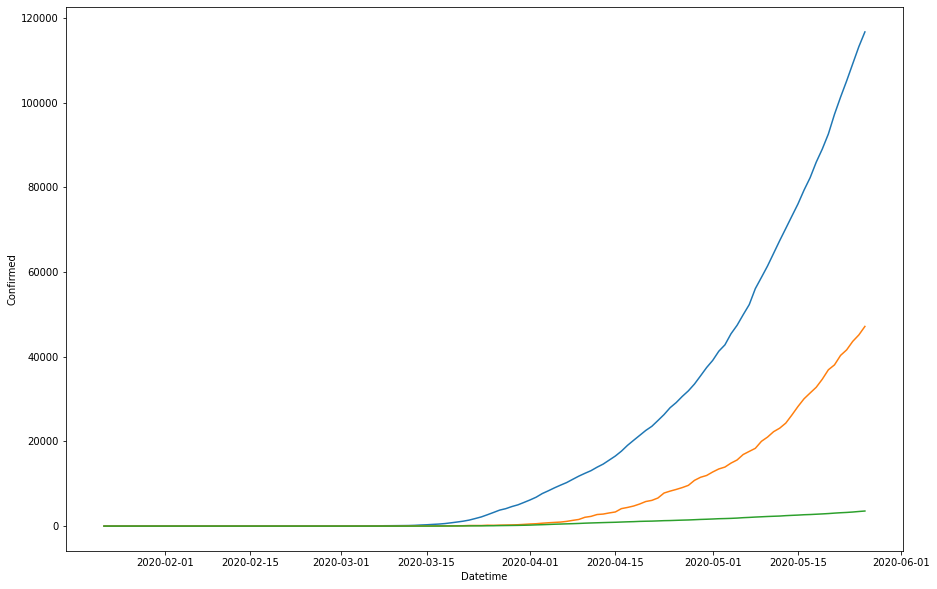

In [ ]:
africa = df[df["Continent"]=="Africa"]
africa = africa.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plotfig(africa)

**Thus the pandamic in africa started around mid march and grew exponentially**
**Compared to other continent, the cases are very low**

# Americas

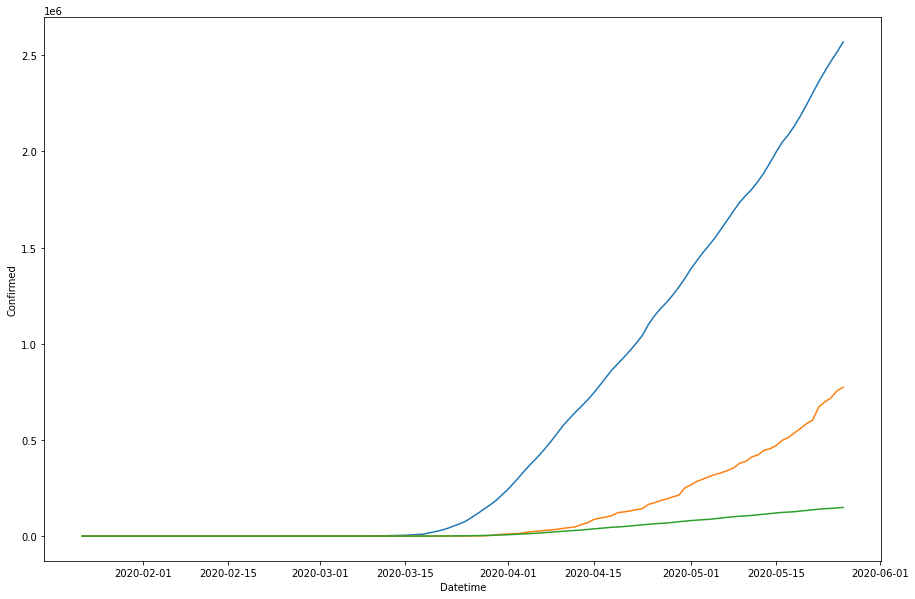

In [ ]:
americas = df[df["Continent"] == "Americas"]
americas = americas.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plotfig(americas)

**The American Continents were both affected around Mid-March. Notice the big gap between Recovered and Confirmed cases. Either people were taking too long to recover or Death Rate was High in this continent**

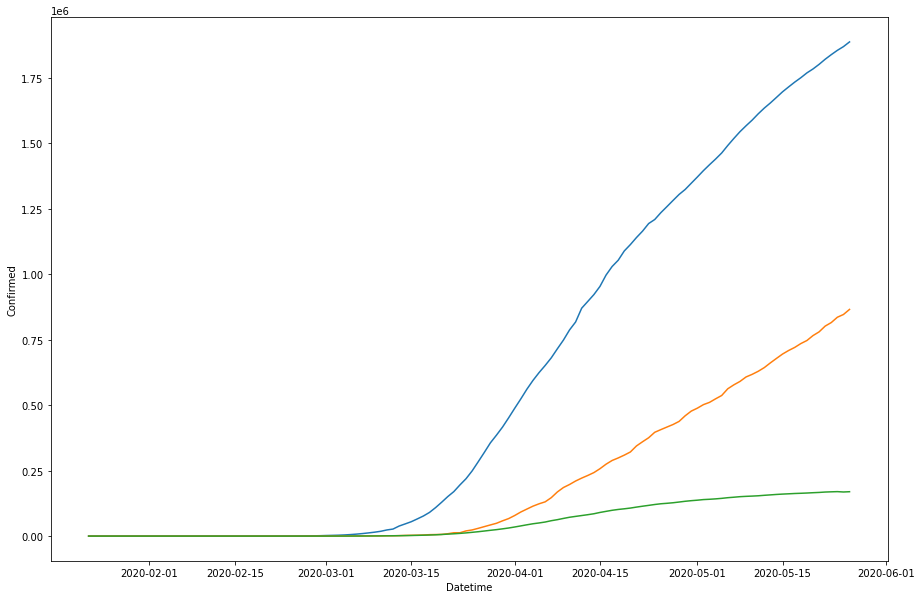

In [ ]:
europe = df[df["Continent"] == "Europe"]
europe = europe.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plotfig(europe)

**Here too the Gap between the Confirmed and recovered cases is big, and death rate is higher than other continents. (Maybe due to colder conditions in these areas??)**

# Australia New zealand

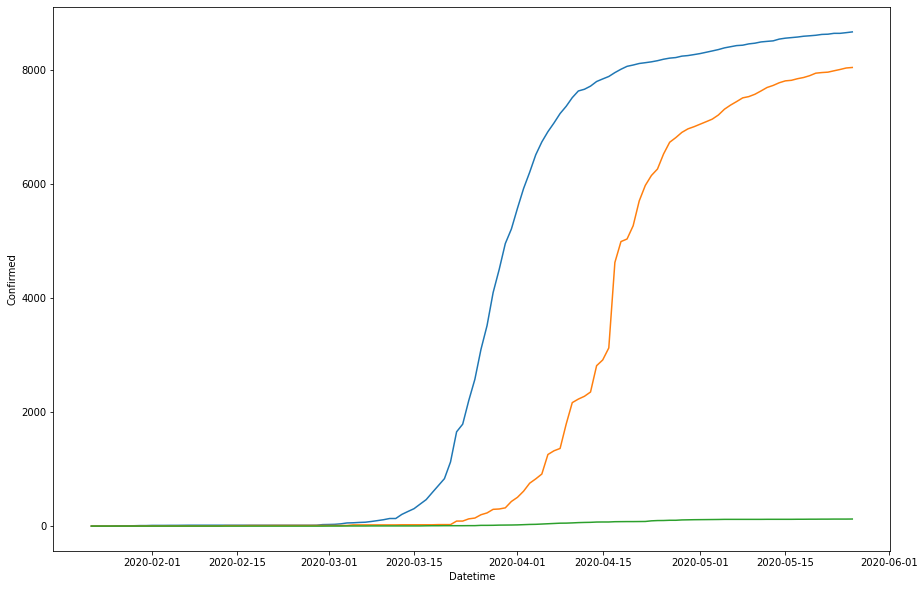

In [ ]:
oceania = df[df["Continent"] == "Oceania"]
oceania = oceania.groupby("Datetime")[["Confirmed", "Recovered", "Deaths"]].agg(np.sum)
plotfig(oceania)

**The confirmed cases spike was much bigger in these areas than other continents, but the number is much smaller.  Plus the recovery seems to be really good, and the death rate low**

# Now lets analyse top 10 countries with most cases

In [ ]:
top10 = df.groupby("Country").agg({"Confirmed" : np.max})
#top10 = top10["Confirmed"]
top10 = top10.sort_values("Confirmed", axis = 0, ascending = False).head(10)
top10

,Confirmed
Country,
US,1680913
Brazil,391222
Russia,362342
United Kingdom,266599
Spain,236259
Italy,230555
France,183067
Germany,181200
Turkey,158762


**Lets see top10 countries by death**

In [ ]:
top10_deaths = df.groupby(["Country"]).agg({"Deaths" : np.max})
top10_deaths = top10_deaths.sort_values("Deaths", axis = 0, ascending = False).head(10)
top10_deaths

,Deaths
Country,
US,98913
United Kingdom,37130
Italy,32955
Spain,28752
France,28533
Brazil,24512
Belgium,9334
Germany,8372
Mexico,8134


**Most of the first world countries seem to have high death rate, Mexico and Iran, which are both not in top 10 list of confirmed cases are in top 10 list of deaths, which is surprising**

**India, Turkey and Russia seem to be well off in number of deaths.**

**Before it was said that maybe due to high cold, the cases in Europian countries might be higher, which is looking more and more likely as we see the top 10 countries in the list are mosty located in cold regions**


# Analysis of India

In [ ]:
india = df[df["Country"] == "India"]
india.head()

,Country,Confirmed,Recovered,Deaths,Continent,Datetime
79,India,0,0,0,Asia,2020-01-22
267,India,0,0,0,Asia,2020-01-23
455,India,0,0,0,Asia,2020-01-24
643,India,0,0,0,Asia,2020-01-25
831,India,0,0,0,Asia,2020-01-26


Lets see the timeline 

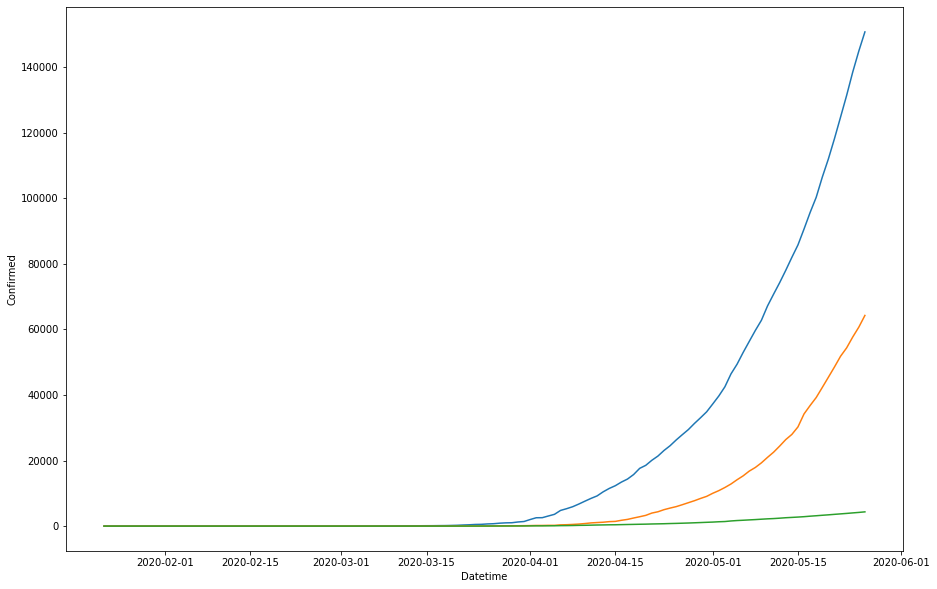

In [ ]:
plotfig(india)

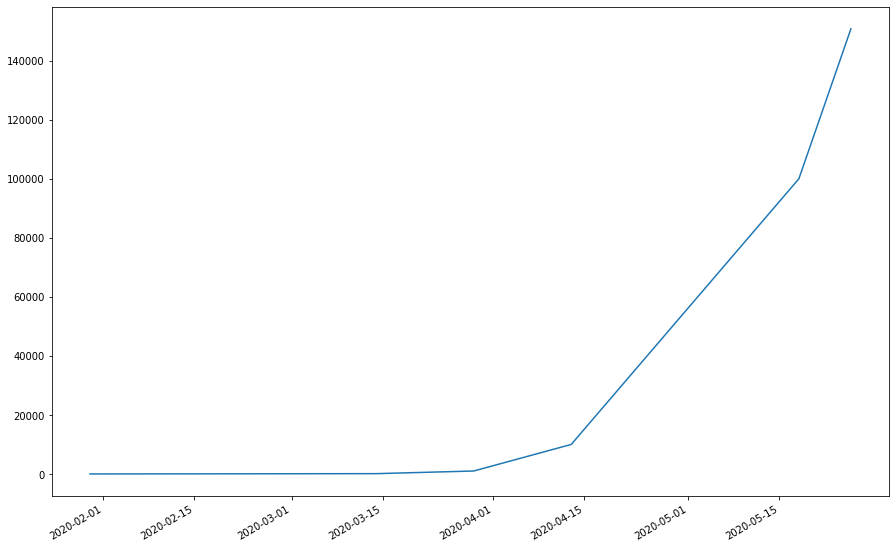

In [ ]:
ind_dict = {}
for i in [1,100,1000,10000,100000]:
  ind_dict[india[india["Confirmed"]>=i]["Datetime"].iloc[0]] = i
ind_dict[india.tail(1)["Datetime"].iloc[0]] = india.tail(1)["Confirmed"].iloc[0]
case_df = pd.Series(ind_dict)
case_df.plot(figsize=(15,10))

1st case was found on Jan 30

It took nearly 45 to reach 100 cases (14-03-2020)

But in the next 14 days, the cases reached 1000! (29-03-2020)

And in the next 15 days the cases reached 10000! (13-04-2020)

Next 1 month : 1,00,000 (18-05-2020)

On 26-05-2020, the number of cases were 150793



In [ ]:
case_df

2020-01-30         1
2020-03-14       100
2020-03-29      1000
2020-04-13     10000
2020-05-18    100000
2020-05-26    150793
dtype: int64

Lets explore Death rates more

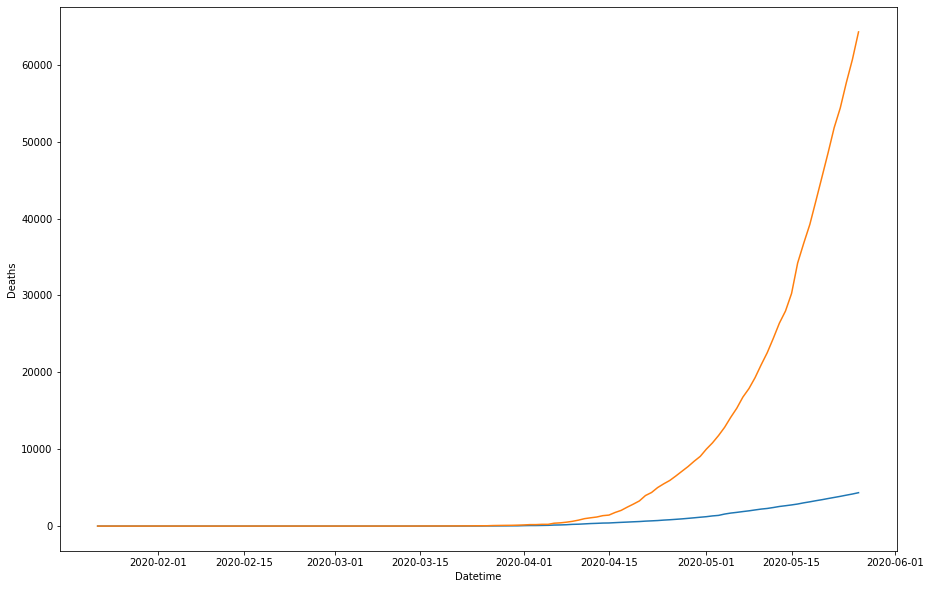

In [ ]:
plt.figure().set_size_inches(15,10)
sns.lineplot(x = "Datetime", y = "Deaths", data = india)
sns.lineplot(x = "Datetime", y = "Recovered", data = india)

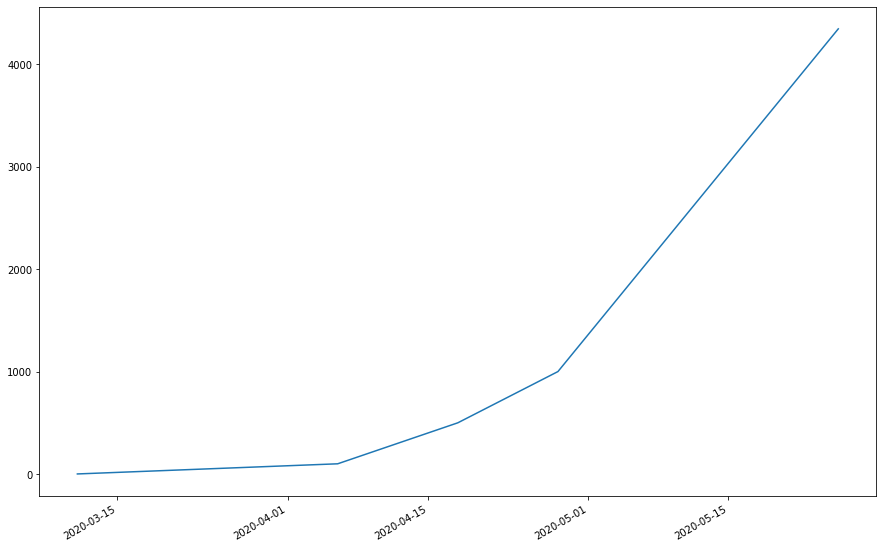

In [ ]:
ind_deaths = {}
for i in [1,100,500,1000]:
  ind_deaths[india[india["Deaths"]>=i]["Datetime"].iloc[0]] = i
ind_deaths[india.tail(1)["Datetime"].iloc[0]] = india.tail(1)["Deaths"].iloc[0]
case_df = pd.Series(ind_deaths)
case_df.plot(figsize=(15,10))

In [ ]:
case_df

2020-03-11       1
2020-04-06     100
2020-04-18     500
2020-04-28    1000
2020-05-26    4344
dtype: int64

<BarContainer object of 2 artists>

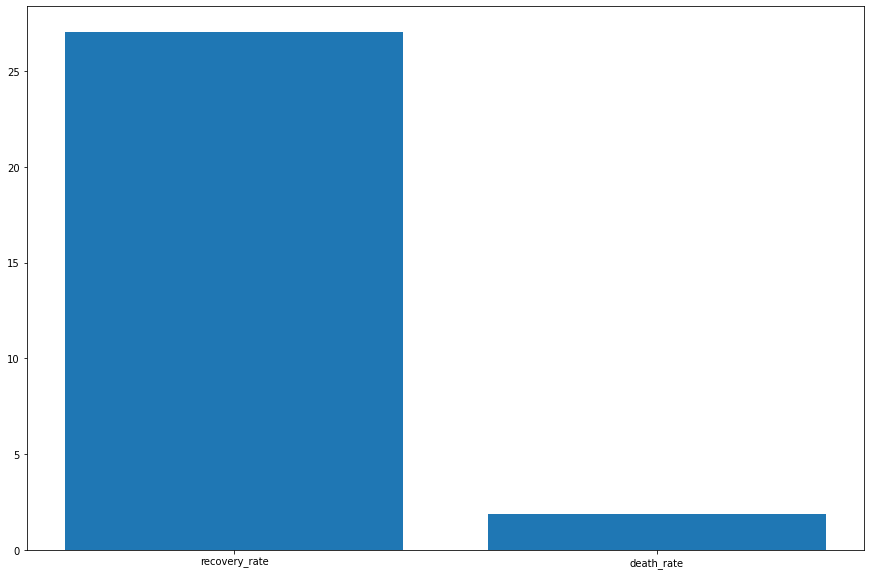

In [ ]:
rate = {}
rate["recovery_rate"] = np.mean((india["Recovered"]/ india["Confirmed"])*100)
rate["death_rate"] = np.mean((india["Deaths"]/india["Confirmed"])*100)
keys = rate.keys()
values = rate.values()
plt.figure().set_size_inches(15,10)
plt.bar(keys,values)

<BarContainer object of 3 artists>

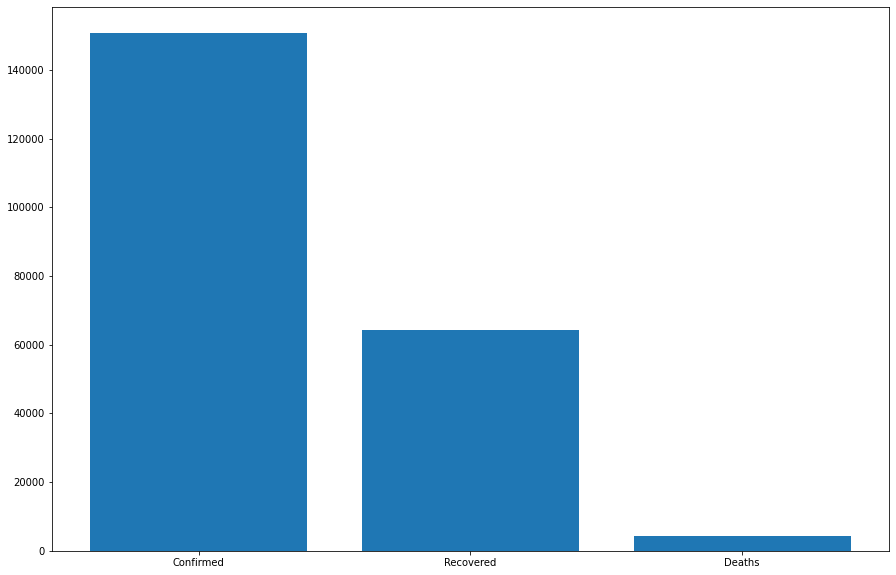

In [ ]:
cases = {}
cases["Confirmed"] = india.tail(1)["Confirmed"].iloc[0]
cases["Recovered"] = india.tail(1)["Recovered"].iloc[0]
cases["Deaths"] = india.tail(1)["Deaths"].iloc[0]
plt.figure().set_size_inches(15,10)
plt.bar(cases.keys(), cases.values())

 # Forecasting Total Number of Cases Worldwide

## Prophet

In [ ]:
from fbprophet import Prophet
# print version number
print('Prophet %s' % prophet.__version__)

NameError: ignored

In [ ]:
confirmed = df.groupby("Datetime")["Confirmed"].agg(np.sum).reset_index()
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
deaths = df.groupby("Datetime")["Deaths"].agg(np.sum).reset_index()
deaths.columns = ['ds', 'y']
recovered = df.groupby("Datetime")["Recovered"].agg(np.sum).reset_index()
recovered.columns = ['ds', 'y']

In [ ]:
#Fitting Prophet Model
confirm_model = Prophet().fit(confirmed)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = confirm_model.make_future_dataframe(periods = 150)        #Predicting what the confirmed cases would be for next 3 month
future.tail() 

,ds
271,2020-10-19
272,2020-10-20
273,2020-10-21
274,2020-10-22
275,2020-10-23


So, 23-10-2020, will be our last date to predict

In [ ]:
forecast = confirm_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
271,2020-10-19,1.852456e+07,1.512306e+07,2.190820e+07
272,2020-10-20,1.861214e+07,1.517011e+07,2.203603e+07
273,2020-10-21,1.869892e+07,1.523404e+07,2.213851e+07
274,2020-10-22,1.879222e+07,1.527978e+07,2.229547e+07
275,2020-10-23,1.888555e+07,1.531002e+07,2.242265e+07


so the model predicts there will be around max 224 million cases, but in reality, on oct - 23, there were 415 million cases worldwide.
So the model is very much off from the target

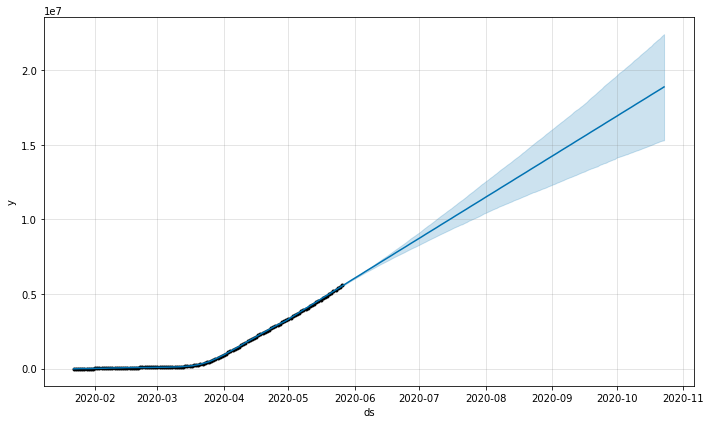

In [ ]:
confirm_plot = confirm_model.plot(forecast)

So the model is predicting Linear increase in the number of cases, while the increase has been exponential